# Diversified Portfolio Notebook

## Set Up and Execute Alapaca SDK Request

### Importing the Required Libraries

In [1]:
# Import Required Libraries

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np

%matplotlib inline

### Loading the .env file

In [2]:
# Make sure dotenv is loaded
load_dotenv()

True

### Alpaca API and Secret Key Variables

In [3]:
# Create Alpaca key variables to call from .env() file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

### Create the ALpaca REST Object

In [4]:
# Create our Alpaca REST object
alpaca = tradeapi.REST(
  alpaca_api_key,
  alpaca_secret_key,
  api_version="v2"
)

alpaca

### Set the Start and End Dates

In [6]:
# Set the start and end dates for the information we want to pull from Alpaca
start_date = pd.Timestamp("2020-01-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-02", tz="America/New_York").isoformat()

### Set the Tickers for Alpaca to Fetch

In [7]:
# Set the list of tickers we want the Alpaca request to fetch
tickers = ["VOO", "MSFT", "AAPL", "BND", "AMT", "VUG", "TSLA", "AMZN", "EDV", "PLD"]

### Set the Timeframe for the Alpaca Request

In [8]:
# Set the timeframe of collection. We just need the a daily price point
timeframe = "1D"

### Create the Request for Alpaca Using get_barset()

In [9]:
# Create the request of the data to fetch via the Alpaca SDK
diversified_prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  limit=1000,
  start=start_date,
  end=end_date
).df

diversified_prices_df

AAPL                                         \
                             open      high       low   close     volume   
time                                                                       
2020-01-02 00:00:00-05:00  296.24  300.6000  295.1900  300.58   30589026   
2020-01-03 00:00:00-05:00  297.15  300.5800  296.5000  297.38   31609363   
2020-01-06 00:00:00-05:00  293.79  299.9600  292.7500  299.78   27487207   
2020-01-07 00:00:00-05:00  299.84  300.9000  297.4800  298.27   24353387   
2020-01-08 00:00:00-05:00  297.16  304.4399  297.1560  303.15   28984028   
...                           ...       ...       ...     ...        ...   
2020-12-24 00:00:00-05:00  131.32  133.4600  131.1000  131.99   51675667   
2020-12-28 00:00:00-05:00  133.99  137.3400  133.5100  136.73  116008068   
2020-12-29 00:00:00-05:00  138.05  138.7890  134.3409  134.93  114407189   
2020-12-30 00:00:00-05:00  135.58  135.9900  133.4000  133.72   87788124   
2020-12-31 00:00:00-05:00  134.08  134.7400  131.7200  132.58   86901528   

                              AMT                                       ...  \
                             open      high       low   close   volume  ...   
time                                                                    ...   
2020-01-02 00:00:00-05:00  229.68  231.1499  228.0051  228.50  1205047  ...   
2020-01-03 00:00:00-05:00  227.56  229.8300  227.0000  228.63  1293710  ...   
2020-01-06 00:00:00-05:00  228.48  230.0000  227.8922  228.51  1077776  ...   
2020-01-07 00:00:00-05:00  227.13  227.5700  221.6200  223.68  1159574  ...   
2020-01-08 00:00:00-05:00  223.48  226.4850  222.7900  225.56   963541  ...   
...                           ...       ...       ...     ...      ...  ...   
2020-12-24 00:00:00-05:00  216.44  219.3900  216.1900  218.64   581627  ...   
2020-12-28 00:00:00-05:00  218.87  221.4500  217.4300  221.04  1078952  ...   
2020-12-29 00:00:00-05:00  222.21  223.4200  220.4200  220.48  1028791  ...   
2020-12-30 00:00:00-05:00  220.51  221.5300  219.3500  220.52  1144758  ...   
2020-12-31 00:00:00-05:00  219.76  224.6650  219.6000  224.30  1297773  ...   

                              VOO                                        VUG  \
                             open    high       low   close   volume    open   
time                                                                           
2020-01-02 00:00:00-05:00  297.29  298.45  296.3400  298.44  3098524  183.57   
2020-01-03 00:00:00-05:00  295.22  297.36  295.0400  296.25  2956475  182.50   
2020-01-06 00:00:00-05:00  294.42  297.42  294.3500  297.36  2645636  182.33   
2020-01-07 00:00:00-05:00  296.82  297.27  296.0611  296.52  1854570  184.69   
2020-01-08 00:00:00-05:00  296.71  299.31  296.5000  298.06  3358222  184.72   
...                           ...     ...       ...     ...      ...     ...   
2020-12-24 00:00:00-05:00  338.37  339.18  337.7700  339.17  1362634  250.56   
2020-12-28 00:00:00-05:00  341.74  342.46  341.0900  342.08  2679636  253.39   
2020-12-29 00:00:00-05:00  343.63  343.77  340.8700  341.45  2425900  254.87   
2020-12-30 00:00:00-05:00  342.28  342.91  341.5650  341.86  1745448  254.00   
2020-12-31 00:00:00-05:00  341.82  344.37  341.2300  343.62  2589798  253.09   

                                                                    
                               high       low     close     volume  
time                                                                
2020-01-02 00:00:00-05:00  184.7600  183.0900  184.7600  1055649.0  
2020-01-03 00:00:00-05:00  184.4389  182.3700  183.6100   903194.0  
2020-01-06 00:00:00-05:00  184.7800  182.1700  184.7300   777690.0  
2020-01-07 00:00:00-05:00  185.2300  184.2150  184.6035   911559.0  
2020-01-08 00:00:00-05:00  186.8500  184.5400  186.0300   633410.0  
...                             ...       ...       ...        ...  
2020-12-24 00:00:00-05:00  251.6600  250.3700  251.1400   354140.0  
2020-12-28 00:00:00-05:00  254.0100  251.4800 

## Calculate Closing Prices and Daily Prices/Plots

In [10]:
# Create a new empty DF that that holds only the closing prices of each stock
diversified_closing_prices_df = pd.DataFrame()

### For Loop to Access Closing Prices Only

In [11]:
# Using a for loop, for every ticker in the tickers list, select only the close price for each ticker in the prices_df DF
for ticker in tickers:
  diversified_closing_prices_df[ticker] = diversified_prices_df[ticker]["close"]

diversified_closing_prices_df

,VOO,MSFT,AAPL,BND,AMT,VUG,TSLA,AMZN,EDV,PLD
time,,,,,,,,,,
2020-01-02 00:00:00-05:00,298.44,160.73,300.58,83.980,228.50,184.7600,430.2400,1897.71,131.69,88.42
2020-01-03 00:00:00-05:00,296.25,158.59,297.38,84.260,228.63,183.6100,442.7500,1874.93,134.27,89.41
2020-01-06 00:00:00-05:00,297.36,159.02,299.78,84.160,228.51,184.7300,451.4001,1903.33,133.56,89.05
2020-01-07 00:00:00-05:00,296.52,157.60,298.27,84.070,223.68,184.6035,469.1700,1906.86,132.65,88.48
2020-01-08 00:00:00-05:00,298.06,160.14,303.15,83.970,225.56,186.0300,492.0900,1892.09,131.63,88.97
...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00-05:00,339.17,222.71,131.99,88.005,218.64,251.1400,661.6600,3171.16,151.81,97.28
2020-12-28 00:00:00-05:00,342.08,224.96,136.73,87.980,221.04,253.4800,663.7700,3283.96,152.00,98.23
2020-12-29 00:00:00-05:00,341.45,224.29,134.93,88.020,220.48,252.9100,665.9800,3320.71,151.81,97.78


### Calculate the Daily Returns Per Stock in our Stock Portfolio

In [12]:
# Calculate the daily returns for every stock in the Diversified Portfolio
per_diversified_daily_returns = diversified_closing_prices_df.pct_change().dropna()
per_diversified_daily_returns

,VOO,MSFT,AAPL,BND,AMT,VUG,TSLA,AMZN,EDV,PLD
time,,,,,,,,,,
2020-01-03 00:00:00-05:00,-0.007338,-0.013314,-0.010646,0.003334,0.000569,-0.006224,0.029077,-0.012004,0.019591,0.011197
2020-01-06 00:00:00-05:00,0.003747,0.002711,0.008070,-0.001187,-0.000525,0.006100,0.019537,0.015147,-0.005288,-0.004026
2020-01-07 00:00:00-05:00,-0.002825,-0.008930,-0.005037,-0.001069,-0.021137,-0.000685,0.039366,0.001855,-0.006813,-0.006401
2020-01-08 00:00:00-05:00,0.005194,0.016117,0.016361,-0.001189,0.008405,0.007727,0.048852,-0.007746,-0.007689,0.005538
2020-01-09 00:00:00-05:00,0.006911,0.012177,0.021639,0.001191,0.003946,0.009246,-0.021541,0.004709,0.002431,-0.000225
...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00-05:00,0.003788,0.007646,0.007865,0.001536,0.004918,0.002475,0.024273,-0.004886,0.003636,0.011332
2020-12-28 00:00:00-05:00,0.008580,0.010103,0.035912,-0.000284,0.010977,0.009318,0.003189,0.035571,0.001252,0.009766
2020-12-29 00:00:00-05:00,-0.001842,-0.002978,-0.013165,0.000455,-0.002533,-0.002249,0.003329,0.011191,-0.001250,-0.004581


### Calculate Aggregate Daily Returns for Portfolio

In [13]:
# Calculate the daily returns for of the Stock Portfolio
diversified_daily_returns_df = diversified_closing_prices_df.sum(axis=1).pct_change().dropna()
diversified_daily_returns_df

time
2020-01-03 00:00:00-05:00   -0.003934
2020-01-06 00:00:00-05:00    0.010770
2020-01-07 00:00:00-05:00    0.002872
2020-01-08 00:00:00-05:00    0.005150
2020-01-09 00:00:00-05:00    0.003079
                               ...   
2020-12-24 00:00:00-05:00    0.001422
2020-12-28 00:00:00-05:00    0.024499
2020-12-29 00:00:00-05:00    0.006246
2020-12-30 00:00:00-05:00   -0.001497
2020-12-31 00:00:00-05:00   -0.002221
Length: 252, dtype: float64

### Plot the Aggregated Daily Returns

<AxesSubplot:title={'center':'Daily Returns - Diversified Portfolio (Jan. 2020 - Jan. 2021)'}, xlabel='time'>

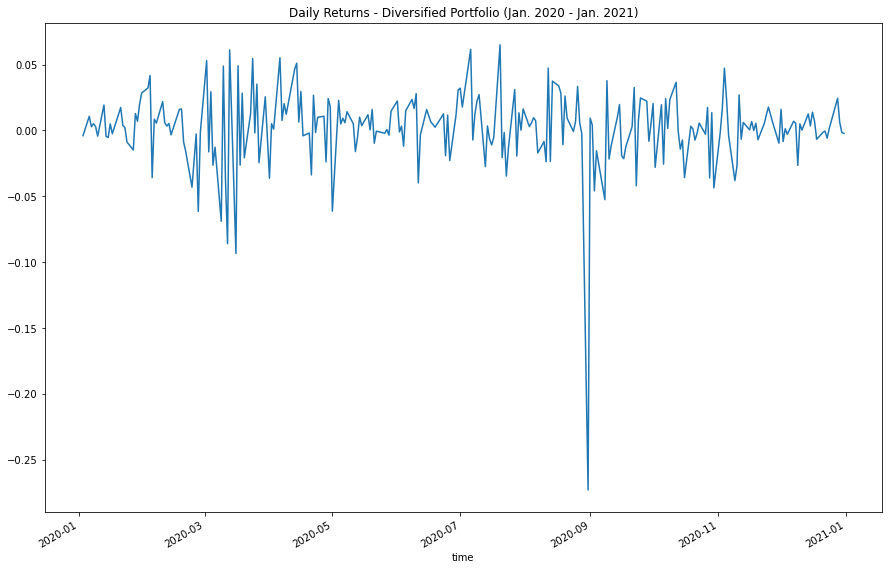

In [14]:
# Plot daily returns for the stocks portfolio
diversified_daily_returns_df.plot(figsize=(15,10), title="Daily Returns - Diversified Portfolio (Jan. 2020 - Jan. 2021)")

## Set Up and Run Monte Carlo Simulation for 10 Years

In [15]:
# Set up Monte Carlo Simulation for a 10 year time period with a $10,000 initial investment
MC_diversified_ten_year = MCSimulation(
  portfolio_data=diversified_prices_df,
  num_simulation=1000,
  num_trading_days=252 * 10
)

MC_diversified_ten_year.portfolio_data.head()

AAPL                                       \
                             open      high      low   close    volume   
time                                                                     
2020-01-02 00:00:00-05:00  296.24  300.6000  295.190  300.58  30589026   
2020-01-03 00:00:00-05:00  297.15  300.5800  296.500  297.38  31609363   
2020-01-06 00:00:00-05:00  293.79  299.9600  292.750  299.78  27487207   
2020-01-07 00:00:00-05:00  299.84  300.9000  297.480  298.27  24353387   
2020-01-08 00:00:00-05:00  297.16  304.4399  297.156  303.15  28984028   

                                           AMT                              \
                          daily_return    open      high       low   close   
time                                                                         
2020-01-02 00:00:00-05:00          NaN  229.68  231.1499  228.0051  228.50   
2020-01-03 00:00:00-05:00    -0.010646  227.56  229.8300  227.0000  228.63   
2020-01-06 00:00:00-05:00     0.008070  228.48  230.0000  227.8922  228.51   
2020-01-07 00:00:00-05:00    -0.005037  227.13  227.5700  221.6200  223.68   
2020-01-08 00:00:00-05:00     0.016361  223.48  226.4850  222.7900  225.56   

                           ...       VOO                                \
                           ...       low   close   volume daily_return   
time                       ...                                           
2020-01-02 00:00:00-05:00  ...  296.3400  298.44  3098524          NaN   
2020-01-03 00:00:00-05:00  ...  295.0400  296.25  2956475    -0.007338   
2020-01-06 00:00:00-05:00  ...  294.3500  297.36  2645636     0.003747   
2020-01-07 00:00:00-05:00  ...  296.0611  296.52  1854570    -0.002825   
2020-01-08 00:00:00-05:00  ...  296.5000  298.06  3358222     0.005194   

                              VUG                                          \
                             open      high      low     close     volume   
time                                                                        
2020-01-02 00:00:00-05:00  183.57  184.7600  183.090  184.7600  1055649.0   
2020-01-03 00:00:00-05:00  182.50  184.4389  182.370  183.6100   903194.0   
2020-01-06 00:00:00-05:00  182.33  184.7800  182.170  184.7300   777690.0   
2020-01-07 00:00:00-05:00  184.69  185.2300  184.215  184.6035   911559.0   
2020-01-08 00:00:00-05:00  184.72  186.8500  184.540  186.0300   633410.0   

                                        
                          daily_return  
time                                    
2020-01-02 00:00:00-05:00          NaN  
2020-01-03 00:00:00-05:00    -0.006224  
2020-01-06 00:00:00-05:00     0.006100  
2020-01-07 00:00:00-05:00    -0.000685  
2020-01-08 00:00:00-05:00     0.007727  

[5 rows x 60 columns]

### Run the MC Simulation for 10 Years

In [16]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_diversified_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001668,1.000234,1.017612,1.009643,1.012813,0.992493,0.997471,0.990418,1.001238,1.014579,...,0.998220,0.991866,1.003388,1.012725,1.005665,0.999280,1.021513,1.011535,1.013956,1.011572
2,1.001547,1.005437,0.993524,1.012560,1.027175,0.976604,0.989232,1.004914,1.027037,1.024347,...,0.978875,0.995124,1.022655,1.012175,0.998148,0.987394,1.020633,0.997451,1.016531,1.013762
3,1.018292,0.994532,1.015797,1.008359,1.020275,0.981279,0.991099,1.022952,1.027415,1.018716,...,0.989034,0.995980,1.019045,1.020417,1.010924,0.973194,1.011020,1.006448,1.015605,1.030566
4,1.010627,0.989762,1.028629,1.036804,1.026185,0.982323,0.995662,1.037824,1.036408,1.001150,...,0.977140,0.977384,1.016979,1.027176,1.012688,0.973118,1.026504,0.988972,1.031143,1.026787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,22.285556,35.960384,62.113820,14.589338,24.489353,44.284731,62.205396,7.829311,30.966559,59.461003,...,15.120108,18.654411,40.761586,32.565456,19.786111,35.640375,39.060595,62.137461,23.469787,21.329184
2517,22.362719,36.709551,62.356270,14.890419,24.679352,44.095795,62.380610,7.917754,31.339565,60.437695,...,15.219887,18.775531,41.039356,32.449063,19.849872,35.493532,39.791501,60.891173,23.486120,21.810615
2518,22.232383,36.135146,62.053437,14.737408,25.047696,44.523052,62.990638,7.924570,31.886301,60.924144,...,15.028263,18.724342,42.066844,32.751982,19.969016,35.713939,39.423437,61.349381,23.246454,21.850416
2519,22.298246,36.972366,62.815930,14.705098,24.672896,44.146413,64.573122,8.047897,32.167492,60.394043,...,15.295389,18.803200,42.423984,32.871779,20.162122,35.713816,39.934260,62.031745,23.548722,21.658289


### Plot the MC 10 Year Simulation Visualization

<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

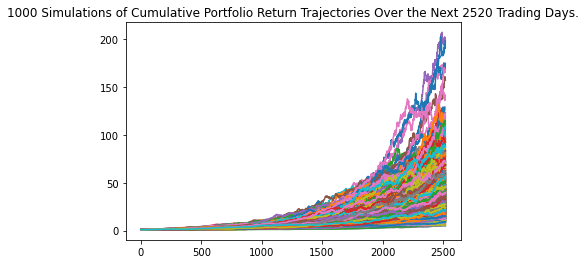

In [17]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot for the diversified portfolio
MC_diversified_ten_year.plot_simulation()

### Plot the MC 10 Year Simulation Distribution Visualization 

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

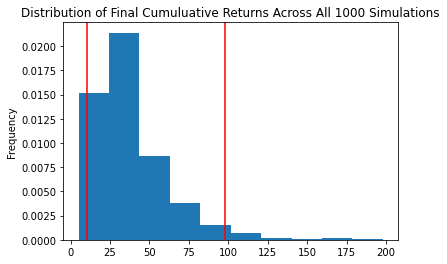

In [18]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_diversified_ten_year.plot_distribution()

### Generate MC 10 Year Simulation Summary Statistics

In [19]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_diversified_ten_year_summary_statistics = MC_diversified_ten_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_diversified_ten_year_summary_statistics)

count           1000.000000
mean              38.651876
std               24.053538
min                5.019143
25%               22.781550
50%               33.054618
75%               47.427540
max              197.998388
95% CI Lower      10.419158
95% CI Upper      97.756604
Name: 2520, dtype: float64


### Calculate the Confidence Intervals to the 95% for the 10 year Simulation on a $10,000 initial investment

In [20]:
# Calculate the 10-year confidence interval lower and upper projections for a $10,000 initial investment
diversified_ten_year_lower_ci = round(MC_diversified_ten_year_summary_statistics[8]*10000, 2)
diversified_ten_year_upper_ci = round(MC_diversified_ten_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of ${diversified_ten_year_lower_ci} and ${diversified_ten_year_upper_ci}")

With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of $104191.58 and $977566.04


## Set Up and Run Monte Carlo Simulation for 30 Years

In [21]:
# Set up Monte Carlo Simulation for a 30 year time period with a $10,000 initial investment in our Diversified Portfolio
MC_diversified_thirty_year = MCSimulation(
  portfolio_data=diversified_prices_df,
  num_simulation=1000,
  num_trading_days=252 * 30
)

MC_diversified_thirty_year.portfolio_data.head()

AAPL                                       \
                             open      high      low   close    volume   
time                                                                     
2020-01-02 00:00:00-05:00  296.24  300.6000  295.190  300.58  30589026   
2020-01-03 00:00:00-05:00  297.15  300.5800  296.500  297.38  31609363   
2020-01-06 00:00:00-05:00  293.79  299.9600  292.750  299.78  27487207   
2020-01-07 00:00:00-05:00  299.84  300.9000  297.480  298.27  24353387   
2020-01-08 00:00:00-05:00  297.16  304.4399  297.156  303.15  28984028   

                                           AMT                              \
                          daily_return    open      high       low   close   
time                                                                         
2020-01-02 00:00:00-05:00          NaN  229.68  231.1499  228.0051  228.50   
2020-01-03 00:00:00-05:00    -0.010646  227.56  229.8300  227.0000  228.63   
2020-01-06 00:00:00-05:00     0.008070  228.48  230.0000  227.8922  228.51   
2020-01-07 00:00:00-05:00    -0.005037  227.13  227.5700  221.6200  223.68   
2020-01-08 00:00:00-05:00     0.016361  223.48  226.4850  222.7900  225.56   

                           ...       VOO                                \
                           ...       low   close   volume daily_return   
time                       ...                                           
2020-01-02 00:00:00-05:00  ...  296.3400  298.44  3098524          NaN   
2020-01-03 00:00:00-05:00  ...  295.0400  296.25  2956475    -0.007338   
2020-01-06 00:00:00-05:00  ...  294.3500  297.36  2645636     0.003747   
2020-01-07 00:00:00-05:00  ...  296.0611  296.52  1854570    -0.002825   
2020-01-08 00:00:00-05:00  ...  296.5000  298.06  3358222     0.005194   

                              VUG                                          \
                             open      high      low     close     volume   
time                                                                        
2020-01-02 00:00:00-05:00  183.57  184.7600  183.090  184.7600  1055649.0   
2020-01-03 00:00:00-05:00  182.50  184.4389  182.370  183.6100   903194.0   
2020-01-06 00:00:00-05:00  182.33  184.7800  182.170  184.7300   777690.0   
2020-01-07 00:00:00-05:00  184.69  185.2300  184.215  184.6035   911559.0   
2020-01-08 00:00:00-05:00  184.72  186.8500  184.540  186.0300   633410.0   

                                        
                          daily_return  
time                                    
2020-01-02 00:00:00-05:00          NaN  
2020-01-03 00:00:00-05:00    -0.006224  
2020-01-06 00:00:00-05:00     0.006100  
2020-01-07 00:00:00-05:00    -0.000685  
2020-01-08 00:00:00-05:00     0.007727  

[5 rows x 60 columns]

### Run the MC Simulation for 30 Years

In [22]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns for our Diversified Portfolio
MC_diversified_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002455,1.005532,1.016414,0.984500,0.997102,1.022722,1.016591,0.994643,0.993929,1.022260,...,1.000648,1.010380,0.996619,0.977504,0.990516,1.003038,0.993875,0.994398,0.995678,1.002353
2,1.002063,1.008395,1.026530,0.990085,1.005382,1.032270,1.024506,0.995144,0.975519,1.036796,...,1.000353,1.012932,0.998564,0.983082,0.964807,0.985027,0.988335,0.975851,1.003440,0.993061
3,1.006448,1.018659,1.017502,0.975407,1.015984,1.017048,1.036600,1.006291,0.968000,1.031880,...,0.988773,1.005903,1.009726,0.981795,0.986110,0.993697,0.994503,0.983513,0.998905,0.988584
4,1.001512,1.027916,1.033772,0.978807,1.013143,1.016862,1.043969,0.998702,0.956420,1.040700,...,0.984407,1.018524,1.016908,0.978413,1.002377,0.988183,0.997313,1.003354,1.007186,0.978969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,34142.796983,22461.083404,171497.531102,144318.208600,51829.838218,13876.645346,18804.219963,10979.617935,16543.129355,143515.486545,...,23922.932629,17686.937006,113758.600226,18616.640404,44863.277853,68519.963610,22253.639743,30080.023886,239770.031778,36253.302836
7557,33936.032508,22372.117133,178828.266837,145516.043662,52243.345652,13972.419361,19278.289339,11255.919375,16262.848935,142895.600974,...,23572.111031,17648.828888,113468.794324,18414.426067,44979.886347,67931.763438,22113.858537,30587.253700,239535.080281,36415.398904
7558,34340.462901,22274.434368,179847.281988,148117.969272,52876.468129,13983.450744,19368.782009,11231.247678,16286.961427,145692.687707,...,24032.522545,17526.241082,116058.346773,18534.489818,45461.471278,67960.667821,22238.606525,30020.695907,239247.498452,36329.934859
7559,34761.797503,22482.934796,181222.706887,146187.541120,53349.959603,13822.158185,19426.645306,11095.682192,16445.350058,146135.059420,...,23544.664754,17519.134681,116445.729977,18550.074946,44582.612214,68042.297504,22317.192389,30464.449779,239998.591601,36047.548050
